#Bring In Data and convert to Pandas Frame

In [ ]:
from google.colab import files
ecommerce_customers = files.upload()

Saving Ecommerce Customers to Ecommerce Customers


In [ ]:
print(ecommerce_customers["Ecommerce Customers"])
bytes_data = ecommerce_customers["Ecommerce Customers"]

In [ ]:
from io import StringIO
import pandas as pd
s=str(bytes_data,'utf-8')

data = StringIO(s) 

df=pd.read_csv(data)

#Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


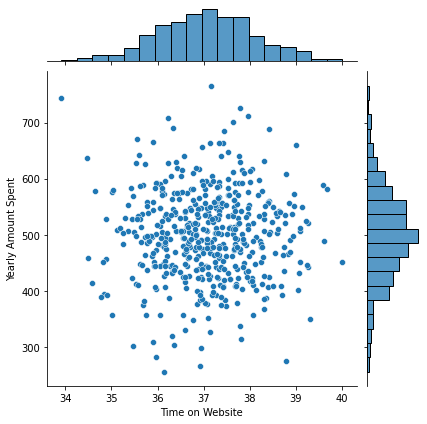

In [ ]:
sns.jointplot(df["Time on Website"], df["Yearly Amount Spent"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


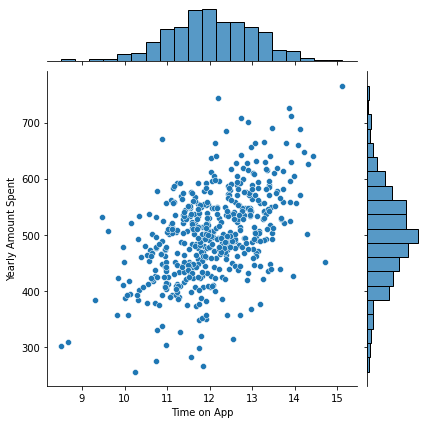

In [ ]:
sns.jointplot(df["Time on App"], df["Yearly Amount Spent"])

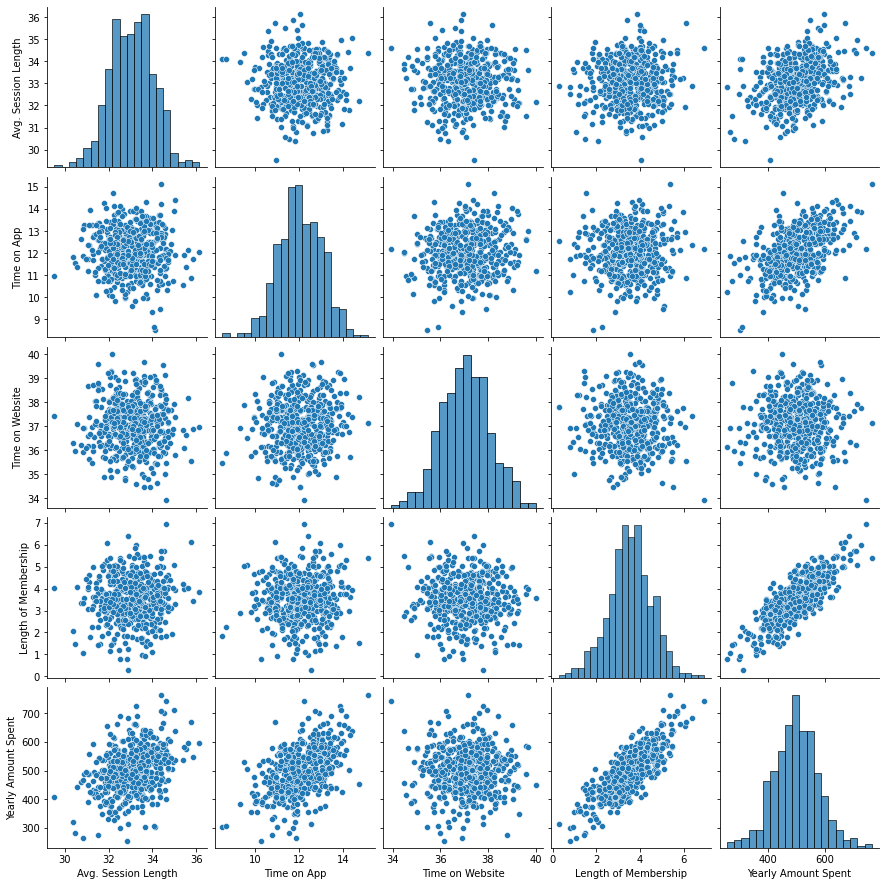

In [ ]:
sns.pairplot(df)

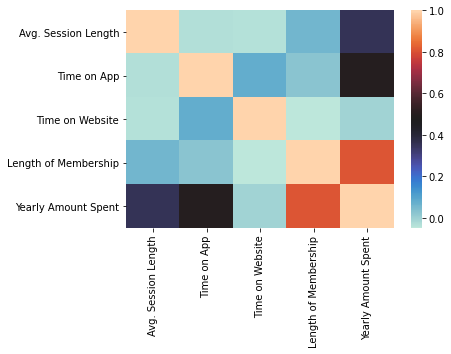

In [ ]:
sns.heatmap(df.corr(), cmap="icefire")
#stronger negative correlation between time on website and yearly amount spent vs time on app and yearly amount spent

#Fitting a Linear Regression Model

In [ ]:
#Determine features and the y classification 
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
X_features = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y_labels = df[["Yearly Amount Spent"]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, )
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

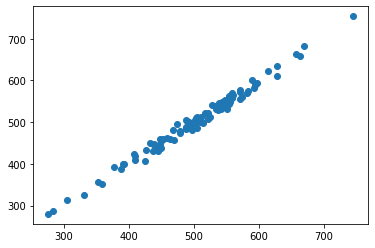

In [ ]:
y_predict_labels = lm.predict(X_test)
plt.scatter(y_test,y_predict_labels)

#Linear Regression Model Evaluation

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict_labels))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_labels))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_labels)))

MAE: 7.766130827561651
MSE: 85.56880232670319
RMSE: 9.250340660035347


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


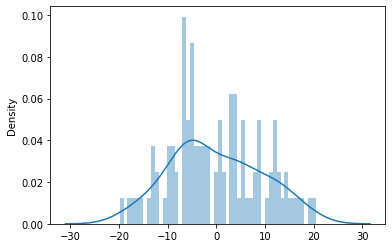

In [ ]:
sns.distplot((y_test-y_predict_labels),bins=50);

In [ ]:
#Associated with Yearly Amount Spent
pd.DataFrame(coeff_df.values.reshape(4,1), X_features.columns, columns=["Coefficients of YAS"])

,Coefficients of YAS
Avg. Session Length,25.685051
Time on App,38.427125
Time on Website,0.122095
Length of Membership,61.687302


#Conclusion
We can see that the website is lacking versus the App - the App seems to be doing much better in increasing the amount of time spent, yearly. Hence, we should focus on the Website.  